Importing Dependencies

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

Data Collection and processing


In [130]:
# loading the data from csv file
car_dataset=pd.read_csv("/content/car data.csv")

In [131]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [132]:
# checking missing data
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [133]:
car_dataset.shape

(301, 9)

In [134]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [135]:
# checkin distrinution catagorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding Catagorical Data

In [136]:
# encoding Fuel_type column
car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding Seller_Type column
car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)

# encoding Transmission column
car_dataset.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-2201307295.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-2201307295.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-2201307295.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [137]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting data into train and test data

In [138]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [139]:
#selling_price in lakhs


Splitting Train and Test data

In [140]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Model train

1. Linear Regression

In [141]:
# loading the linear regression model
lin_reg_model=LinearRegression()

In [142]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [143]:
# prediction training data
training_data_prediction=lin_reg_model.predict(X_train)

In [144]:
# R squared error
error_score=metrics.r2_score(Y_train ,training_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8799451660493711


Visualize the actual and predicted price


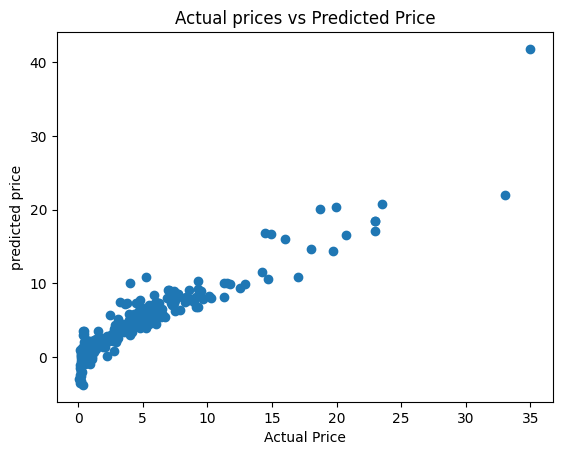

In [145]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

In [146]:
# prediction test data
test_data_prediction=lin_reg_model.predict(X_test)

In [147]:
# R squared error
error_score=metrics.r2_score(Y_test ,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8365766715027051


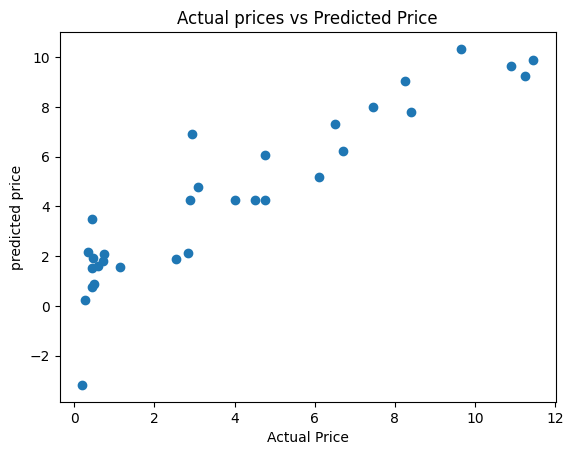

In [148]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

2.Lasso Regression

In [149]:
# loading the lasso regression model
lass_reg_model=Lasso()

In [150]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [151]:
# prediction training data
training_data_prediction=lass_reg_model.predict(X_train)

In [152]:
# R squared error
error_score=metrics.r2_score(Y_train ,training_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8427856123435794


Visualize the actual and predicted price


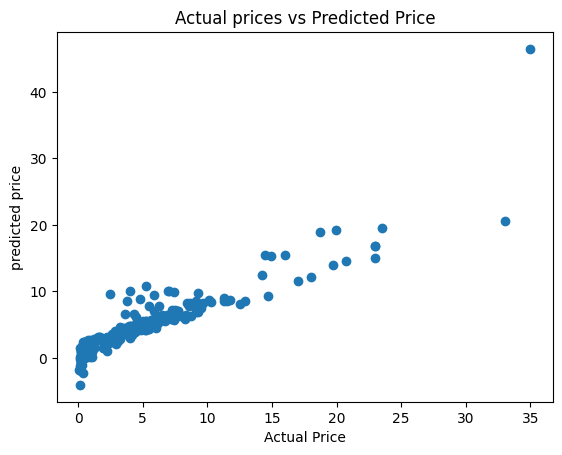

In [153]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

In [154]:
# prediction test data
test_data_prediction=lass_reg_model.predict(X_test)

In [155]:
# R squared error
error_score=metrics.r2_score(Y_test ,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.8709167941173195


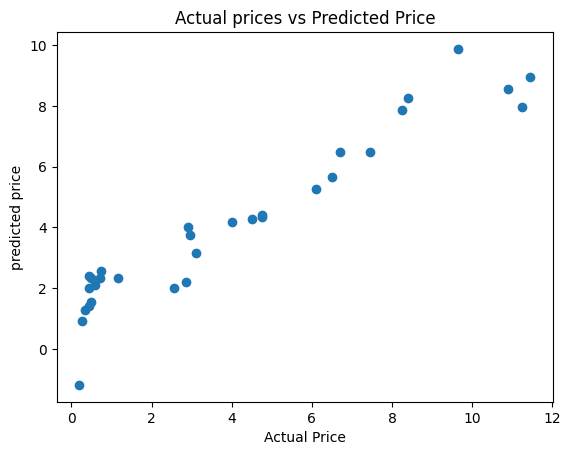

In [156]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

3.RandomForest Regressor

In [157]:
rfc=RandomForestRegressor(n_estimators=5)

In [158]:
rfc.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=5)

Model Evaluation

In [159]:
# prediction training data
training_data_prediction=rfc.predict(X_train)

In [160]:
# R squared error
error_score=metrics.r2_score(Y_train ,training_data_prediction)
print('R squared error :',error_score)

R squared error : 0.9644936588144308


Visualize the actual and predicted price


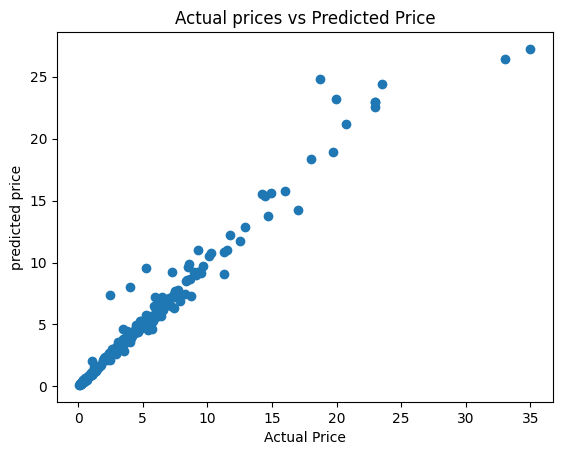

In [161]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

In [162]:
# prediction test data
test_data_prediction=rfc.predict(X_test)

In [163]:
# R squared error
error_score=metrics.r2_score(Y_test ,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.9802176698999671


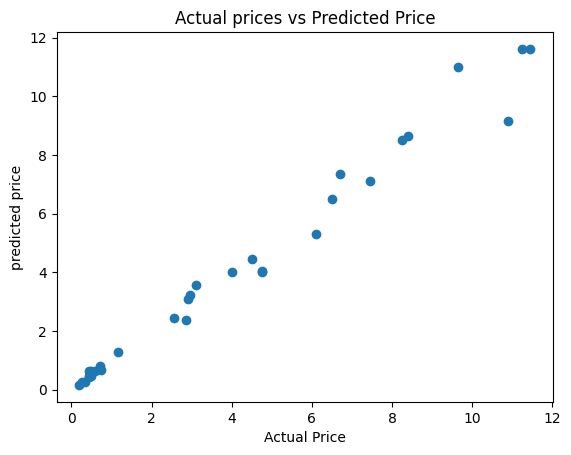

In [164]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

4.XGBoost

In [165]:
xgb=XGBRegressor()

In [166]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

In [167]:
# prediction training data
training_data_prediction=xgb.predict(X_train)

In [168]:
# R squared error
error_score=metrics.r2_score(Y_train ,training_data_prediction)
print('R squared error :',error_score)

R squared error : 0.9999896680984235


Visualize the actual and predicted price


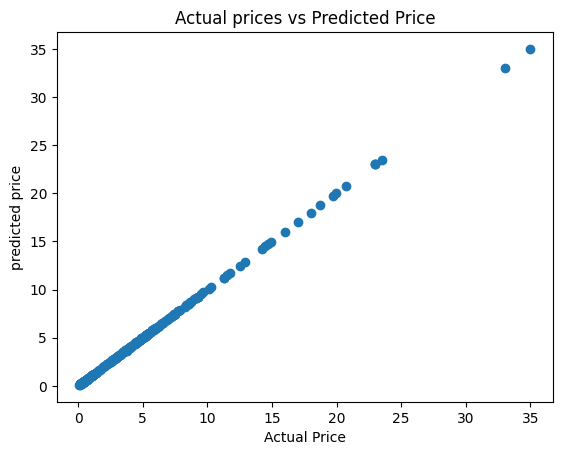

In [169]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

In [170]:
# prediction test data
test_data_prediction=xgb.predict(X_test)

In [171]:
# R squared error
error_score=metrics.r2_score(Y_test ,test_data_prediction)
print('R squared error :',error_score)

R squared error : 0.9807321370840111


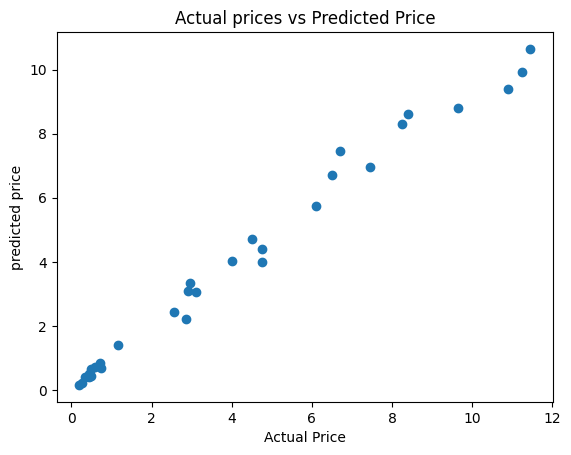

In [172]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('predicted price')
plt.title('Actual prices vs Predicted Price')
plt.show()

In [175]:
# For Linear Regression
input_data=(2014,5.59,27000,0,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=lin_reg_model.predict(input_data_reshaped)
print(prediction)

[3.83901354]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [177]:
# For Lasso Regression
input_data=(2014,5.59,27000,0,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=lass_reg_model.predict(input_data_reshaped)
print(prediction)

[3.8257306]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [178]:
# For RandomForest Regressor
input_data=(2014,5.59,27000,0,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rfc.predict(input_data_reshaped)
print(prediction)

[3.43]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


XGBoost is best fit

In [179]:
# For XGBoostRegressor
input_data=(2014,5.59,27000,0,0,0,0)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=xgb.predict(input_data_reshaped)
print(prediction)

[3.3584368]
